<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [1]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10364987, Enzo Ryo Maeda Kanbayashi' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

*Foi feito um grafo ligando varias cidades e para ver o menor caminho entre as cidades foram usados algoritmos de busca como o BFS e o algoritmo de Dijkstra*.

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



## **1. Grafo das cidades (2,0)**

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

import networkx as nx
import matplotlib.pyplot as plt

def plottree(tree):
  G = nx.DiGraph()

  # Adicionando nós e arestas da árvore ao gráfico
  for parent, children in tree.items():
      for child in children:
          G.add_edge(parent, child)

  # Desenhando o gráfico
  pos = nx.bfs_layout(G,'São Paulo',align='horizontal')
  # pos = nx.spring_layout(G)  # Ou use outra disposição, como nx.shell_layout(G)

  nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
  plt.show()

  return

In [ ]:
# Recursive DFS function
path = [];

def dfs_recursive(tree, node, visited=None):
    if visited is None:
        visited = set()  # Initialize the visited set
    visited.add(node)    # Mark the node as visited
    path.append(node)
    for child in tree[node]:  # Recursively visit children
        if child not in visited:
            dfs_recursive(tree, child, visited)



In [ ]:
# Iterative DFS function
path = [];

def dfs_iterative(tree, start):
    visited = set()  # Track visited nodes
    stack = [start]  # Stack for DFS

    while stack:  # Continue until stack is empty
        node = stack.pop()  # Pop a node from the stack
        if node not in visited:
            visited.add(node)  # Mark node as visited
            path.append(node)
            stack.extend(reversed(tree[node]))  # Add child nodes to stack

> ## **1.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

## Grafo das cidades

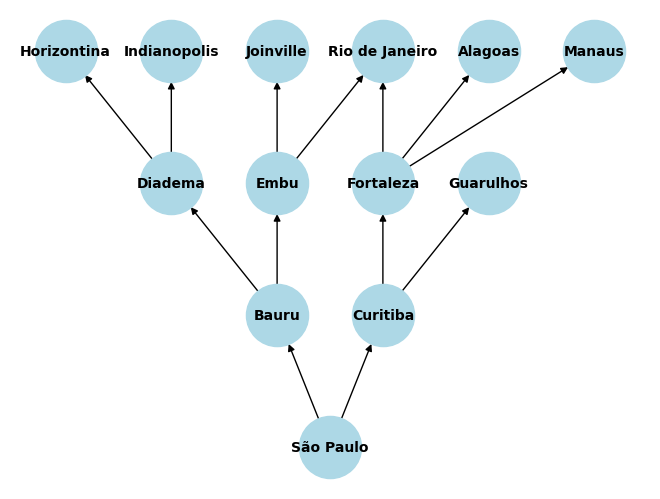

['São Paulo', 'Bauru', 'Diadema', 'Horizontina', 'Indianopolis', 'Embu', 'Joinville', 'Rio de Janeiro', 'Curitiba', 'Fortaleza', 'Alagoas', 'Manaus', 'Guarulhos']


In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# tree das cidades
tree = {
    'São Paulo': ['Bauru', 'Curitiba'],
    'Bauru': ['Diadema', 'Embu'],
    'Curitiba': ['Fortaleza', 'Guarulhos'],
    'Diadema': ['Horizontina', 'Indianopolis'],
    'Embu': ['Joinville', 'Rio de Janeiro'],
    'Fortaleza': ['Alagoas', 'Manaus', 'Rio de Janeiro'],
    'Guarulhos': [],
    'Horizontina': [], 'Indianopolis': [], 'Joinville': [], 'Rio de Janeiro': [],
    'Alagoas': [], 'Manaus': [],
}

plottree(tree)

# Run DFS starting from node 'A'
path = []

dfs_recursive(tree, 'São Paulo')

print(path)

#Alogoritmo escolhido para a entrega final

##Algoritmo de Djikstra

## **2. BFS, Breadth-First Search(2,0)**

###Foi usado o mesmo código da aula como base


In [ ]:
from collections import deque  # Import deque for efficient queue operations

# Define the BFS function
def bfs(tree, start):
    visited = []  # List to keep track of visited nodes
    queue = deque([start])  # Initialize the queue with the starting node

    while queue:  # While there are still nodes to process
        node = queue.popleft()  # Dequeue a node from the front of the queue

        if node not in visited:  # Check if the node has been visited
            visited.append(node)  # Mark the node as visited
            path.append(node)
            # print(node, end=" ")  # Output the visited node

            # Enqueue all unvisited neighbors (children) of the current node
            for neighbor in tree[node]:
                if neighbor not in visited:
                    queue.append(neighbor)  # Add unvisited neighbors to the queue


> ## **2.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

path = []

bfs(tree, 'São Paulo')

print(path)

path = []

bfs(tree, 'Bauru')

print(path)

['São Paulo', 'Bauru', 'Curitiba', 'Diadema', 'Embu', 'Fortaleza', 'Guarulhos', 'Horizontina', 'Indianopolis', 'Joinville', 'Rio de Janeiro', 'Alagoas', 'Manaus']
['Bauru', 'Diadema', 'Embu', 'Horizontina', 'Indianopolis', 'Joinville', 'Rio de Janeiro']


O

## **3. Algoritmo de Djikstra (5,0)**

*O algoritmo de Dijkstra foi escolhido porque é eficiente e garante o menor caminho em grafos com pesos não negativos. Ele utiliza uma fila de prioridade (heap) para processar os nós de maneira otimizada, tornando-o mais rápido que uma busca em largura (BFS) quando há pesos diferentes nas arestas. Isso faz dele a melhor escolha para problemas como navegação GPS, roteamento de redes e planejamento de caminhos em IA, onde encontrar o caminho mais curto é essencial. .*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

import heapq  # Import heapq for priority queue operations

def dijkstra(graph, start):
    shortest_paths = {node: float('inf') for node in graph}  # Inicializa as distâncias como infinito
    shortest_paths[start] = 0  # A distância do nó inicial para ele mesmo é 0
    priority_queue = [(0, start)]  # Fila de prioridade inicializada com o nó de partida

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)  # Obtém o nó com menor distância

        # Se a distância atual for maior do que a distância registrada, ignora
        if current_distance > shortest_paths[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():  # Itera sobre os vizinhos
            distance = current_distance + weight

            # Se encontrarmos um caminho mais curto para o vizinho, atualizamos
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))  # Adiciona à fila de prioridade

    return shortest_paths

> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

In [ ]:
# Seus Códigos aqui intercalados de células de texto com comentários

# Transforma 'árvore' em um grafo com arestas com peso
graph = {}
for node, neighbors in tree.items():
    graph[node] = {}  # Inicializa cada aresta com peso 0
    for neighbor in neighbors:
        graph[node][neighbor] = 1  # Bota um peso 1 em cada aresta

# Chamando a função de Dijkstra
print("Start = São Paulo")
shortest_paths = dijkstra(graph, 'São Paulo')
print(shortest_paths)
print('---------------------------')

print("Start = Bauru")
shortest_paths = dijkstra(graph, 'Bauru')
print(shortest_paths)
print("--------------------------")

Start = São Paulo
{'São Paulo': 0, 'Bauru': 1, 'Curitiba': 1, 'Diadema': 2, 'Embu': 2, 'Fortaleza': 2, 'Guarulhos': 2, 'Horizontina': 3, 'Indianopolis': 3, 'Joinville': 3, 'Rio de Janeiro': 3, 'Alagoas': 3, 'Manaus': 3}
---------------------------
Start = Bauru
{'São Paulo': inf, 'Bauru': 0, 'Curitiba': inf, 'Diadema': 1, 'Embu': 1, 'Fortaleza': inf, 'Guarulhos': inf, 'Horizontina': 2, 'Indianopolis': 2, 'Joinville': 2, 'Rio de Janeiro': 2, 'Alagoas': inf, 'Manaus': inf}
--------------------------


Aqui vemos a distância minima de cada cidade com start até as outras cidades.

# **Referências**

- Notas da aula

---

In [2]:
#@title **Avaliação**
Resumo = 5 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 10 #@param {type:"slider", min:0, max:10, step:1}

BFS = 10 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 0 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 5 #@param {type:"slider", min:0, max:10, step:1}

Geral = 4 #@param {type:"slider", min:0, max:10, step:1}








In [3]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 4.9



tia                        nome  nota
0  10364987   ENZO RYO MAEDA KANBAYASHI   4.9

Busca informada deve ser feita com gráficos com pesos e o grafo das cidades foi completamente artificial